In [5]:
import PyPDF2
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk import FreqDist, bigrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dduqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dduqu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.collocations import *
import wordcloud
import spacy

In [7]:
from nltk.util import ngrams

In [8]:
from nltk.collocations import *

In [9]:
pdf = open("Jeffrey Pfeffer - 7 Rules of Power.pdf", "rb")

reader = PyPDF2.PdfReader(pdf)
page = reader._get_page(12)

print(page.extract_text())

C O N T E N T S
In the Beginning: The Challenge of Power
Intr oduction: Power , Getting Things Done, and Car eer Success
Rule 1  | Get Out of Y our Own W ay
Rule 2  | Break the Rules
Rule 3  | Appear Powerful
Rule 4  | Build a Powerful Brand
Rule 5  | Network Relentlessly
Rule 6  | Use Y our Power
Rule 7  | Success Excuses (Almost) Everything: Why This Is the Most
Important Rule of All
Coda: Staying on the Path to Power
Acknowledgments
Endnotes
Index


In [10]:
print(len(reader.pages))

219


### Libro extraerlo a un txt

In [11]:
#Función para obtener la información del pdf en un archivo txt
def get_text(file):
    with open(file, "rb") as pdf:
        reader = PyPDF2.PdfReader(pdf)
        with open(file + "_text.txt", "w") as txt:
            for no_page in range(10, len(reader.pages)):
                page = reader._get_page(no_page)
                info = page.extract_text()
                if info:
                    txt.write(info)
                else:
                    print(f'Error: No se pudo extraer el texto de la pagina {no_page}')

In [12]:
get_text("Jeffrey Pfeffer - 7 Rules of Power.pdf")

In [13]:
#Ahora voy a leer el txt y tokenizar
with open('Jeffrey Pfeffer - 7 Rules of Power.pdf_text.txt') as f:
    text = f.read()

In [14]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [15]:
#spacy.load('en_core_web_sm')
en = spacy.load('en_core_web_sm')

In [16]:
#Tokenizar las palabras del libro en minuscula
tokens_regexp = regexp_tokenize(text.lower(), pattern)

sentences = sent_tokenize(text)

words = []

for token in tokens_regexp:
    for word in word_tokenize(token):
        words.append(word)

stop_words = stopwords.words('english')

#loading the english language small model of spacy
sw_spacy = en.Defaults.stop_words

text_words = []

for word in words:
    if word.isalnum() and word not in stop_words and word not in sw_spacy and len(word)>3:
        text_words.append(word)

## Riqueza lexica del texto

In [18]:
def lexical_richness(text):
    vocabulary = sorted(set(text))
    l_r = (len(vocabulary)/len(text))*100
    return l_r
lexical_richness(text_words)

28.20325641920843

## Frecuencia de palabras

In [29]:
freq = nltk.FreqDist(text_words)

print(freq.most_common(20))

common_words = [word for word, frequency in freq.most_common(10)]

[('people', 586), ('power', 542), ('social', 240), ('powerful', 120), ('business', 117), ('rules', 116), ('behavior', 96), ('time', 91), ('school', 91), ('company', 86), ('work', 80), ('university', 80), ('things', 79), ('important', 79), ('class', 77), ('success', 74), ('stanford', 74), ('study', 74), ('research', 71), ('career', 71)]


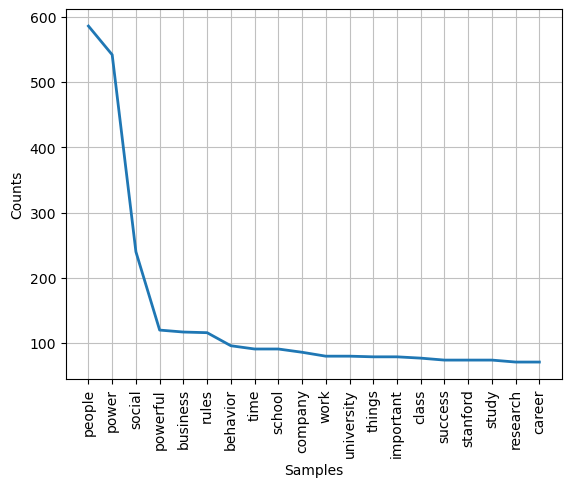

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
freq.plot(20)

### Nube de palabras

In [21]:
wc = wordcloud.WordCloud(width = 800, height = 400, max_words=70, background_color = 'white', contour_width = 1, 
                         contour_color='steelblue', min_font_size=10, max_font_size=300, prefer_horizontal=0.8,
                        colormap='viridis')

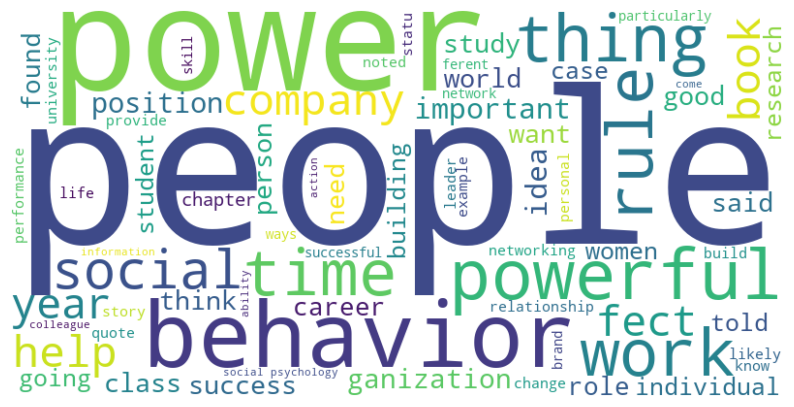

In [22]:
wordcloud_words = ' '.join(text_words)
wc.generate(wordcloud_words)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Bi-gramas

In [23]:
#bigrams = nltk.collocations.BigramAssocMeasures()
#bh = ' '.join(text_words)
#finder = BigramCollocationFinder.from_words(bh)
#finder.apply_freq_filter(20)
#finder.nbest(bigrams.pmi, 10)

In [24]:
md_bigrams = list(bigrams(text_words))
filtered_bigrams = []
for bigram in md_bigrams:
    #print(bigram)
    if len(bigram[0])>3 and len(bigram[1])>3:
        filtered_bigrams.append(bigram)

filtered_list = FreqDist(filtered_bigrams)
filtered_list.most_common(20)

[(('social', 'psychology'), 36),
 (('business', 'school'), 32),
 (('rules', 'power'), 29),
 (('political', 'skill'), 29),
 (('frey', 'pfef'), 19),
 (('school', 'business'), 17),
 (('break', 'rules'), 16),
 (('personality', 'social'), 16),
 (('social', 'science'), 15),
 (('graduate', 'school'), 15),
 (('body', 'language'), 15),
 (('people', 'want'), 14),
 (('path', 'power'), 13),
 (('research', 'shows'), 13),
 (('silicon', 'alley'), 13),
 (('people', 'color'), 13),
 (('breaking', 'rules'), 13),
 (('rule', 'power'), 12),
 (('people', 'need'), 12),
 (('stanford', 'graduate'), 12)]

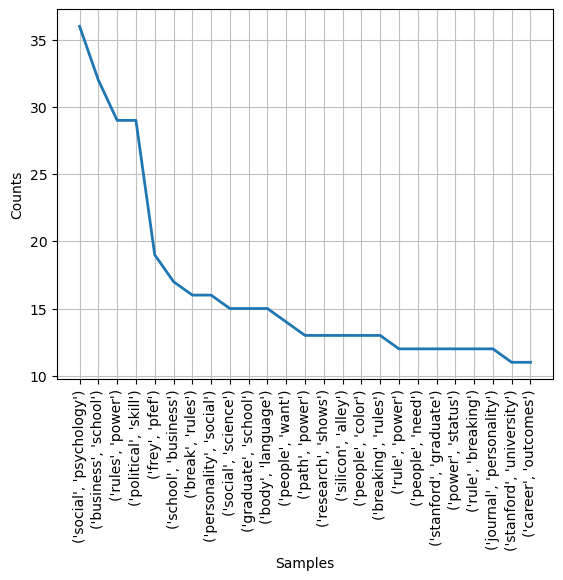

<Axes: xlabel='Samples', ylabel='Counts'>

In [25]:
filtered_list.plot(25)

### Trigramas

In [26]:
md_trigrams = list(ngrams(text_words, 3))
fdist_tri = FreqDist(md_trigrams)
fdist_tri.most_common(20)

[(('personality', 'social', 'psychology'), 16),
 (('graduate', 'school', 'business'), 13),
 (('stanford', 'graduate', 'school'), 12),
 (('journal', 'personality', 'social'), 12),
 (('school', 'business', 'stanford'), 9),
 (('harvard', 'business', 'school'), 7),
 (('journal', 'social', 'psychology'), 7),
 (('women', 'people', 'color'), 6),
 (('stanford', 'business', 'school'), 6),
 (('2021', 'https', 'wikipedia'), 6),
 (('https', 'wikipedia', 'wiki'), 6),
 (('business', 'stanford', 'university'), 6),
 (('seven', 'rules', 'power'), 5),
 (('business', 'school', 'professor'), 5),
 (('harvar', 'business', 'review'), 5),
 (('motion', 'picture', 'association'), 5),
 (('september', '2021', 'https'), 5),
 (('build', 'powerful', 'brand'), 4),
 (('robert', 'moses', 'master'), 4),
 (('chapter', 'rule', 'breaking'), 4)]

## Colocaciones

In [27]:
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text_words)

In [32]:
finder.apply_freq_filter(20)
collocations = finder.nbest(bigram_measure.pmi, 10)
collocations

[('political', 'skill'),
 ('business', 'school'),
 ('social', 'psychology'),
 ('rules', 'power')]

### Summary

In [37]:
selected_sentences = []
for sentence in sentences:
    for collocation in collocations:
        if collocation[0] or collocation[1] in sentence.lower():
            selected_sentences.append(sentence)
            break
            
summary = ' '.join(selected_sentences)
print(summary)

This book is designed to provide accurate and authoritative information about professional
development. Neither the author nor the publisher is engaged in rendering legal, accounting, or other
professional services by publishing this book. If any such assistance is required, the services of a
qualified financial professional should be sought. The author and publisher will not be responsible
for any liability , loss, or risk incurred as a result of the use and application of any information
contained in this book. 7 Rules of Power  copyright © 2022 by Jef frey Pfef fer
All rights reserved. No part of this book may be used or reproduced in any manner whatsoever
without written permission of the publisher , except in the case of brief quotations embodied in
critical articles or reviews. Matt Holt is an imprint of BenBella Books, Inc.
10440 N. Central Expressway
Suite 800
Dallas, TX 75231
benbellabooks.com
Send feedback to feedback@benbellabooks.com
BenBella  and Matt Holt  are federally r